# **New York Yellow Taxi Rides in February 2019** #
### Machine Learning Project ###
 Zach Karlin, Omer Khan, Eric Zepeda

![Yellow taxi cabs in New York](https://github.com/Zach-Karlin/MLproject/blob/master/taxi-cabs.jpg?raw=true)

## **ML Problem Framing** ##

People ride taxis every day to get from place to place.  Especially in New York City, taxis seem to be ubiquitous.  Hundreds of taxis fill the streets of the city, and thousands of people ride in a New York taxi every day.  Especially during the winter, even in such a walkable city, many people in New York want to ride a taxi to escape the cold.  Questions can be raised about taxi rides in this city, such as if price of a taxi ride depends on the temperature, wind speed, and precipitation, and distance. 

Our hypothesis is that temperatures are associated with a higher fare amount, or price. We think this because longer distances mean that the car must use more gas, and traveling longer distances mean that drivers must advocate more time to completing a trip.  Also, we believe that colder temperatures would lead to more people wanting to ride a taxi from place to place.  From the law of demand and supply, the increased demand should mean that the price would increase.  

In a machine learning context, we seek to predict the price of a taxi ride based on a variety of factors such as distance and temperature.  This information would be useful for both the consumer and the producer, as consumers would want to know which factors can contribute to the lowest price for a cab ride, and producers would want to know how they can make the most profit.

First, we import pandas.

In [1]:
import pandas as pd

Next, we import the open aws dataset for yellow nyc taxis from February 2019

In [2]:
df = pd.read_csv("http://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2019-02.csv")

## **Data Collection** ##

We collected data by using an AWS open dataset, specifically from the New York Taxi Limousine Commision (TLC) Trip Record Data.  These datasets allow us to access many csv files related to our project.  There were many csv files with data regarding NY taxi drivers.  Specifically, the website contained one csv file for every month and for different types of taxis, with over 7,000,000 data entries for most of these files.  For the purposes of this machine learning algorithm, we sampled data from the most recent year during the winter.  The dataset selected, *df*, was from February 2019 for yellow taxi cabs.

Additionally, data has been collected from [Weather Underground](https://www.wunderground.com/history/monthly/us/ny/new-york-city/KLGA/date/2019-2). This website displays the days of the month of February, and the associated temperatures, wind speed, and precipitation in New York City that correspond with each day. In this notebook, this dataset is called *df2*. 

We acknowledged the challenge of knowing that the finished algorithm could not be representative of all months during the year.  As we sampled data from the winter, we could not use this model to make predictions about how temperature, for example, affects taxi rides during the summer because temperatures during the summer are much warmer, on average, than temperatures during the winter. 


Here are the first five rows of the dataset.

In [3]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1,2019-02-01 00:59:04,2019-02-01 01:07:27,1,2.1,1,N,48,234,1,9.0,0.5,0.5,2.0,0.0,0.3,12.3,0.0
1,1,2019-02-01 00:33:09,2019-02-01 01:03:58,1,9.8,1,N,230,93,2,32.0,0.5,0.5,0.0,0.0,0.3,33.3,0.0
2,1,2019-02-01 00:09:03,2019-02-01 00:09:16,1,0.0,1,N,145,145,2,2.5,0.5,0.5,0.0,0.0,0.3,3.8,0.0
3,1,2019-02-01 00:45:38,2019-02-01 00:51:10,1,0.8,1,N,95,95,2,5.5,0.5,0.5,0.0,0.0,0.3,6.8,0.0
4,1,2019-02-01 00:25:30,2019-02-01 00:28:14,1,0.8,1,N,140,263,2,5.0,0.5,0.5,0.0,0.0,0.3,6.3,0.0


Here, we are uploading the second dataset from the computer and onto the notebook.

In [4]:
!wget https://raw.githubusercontent.com/Zach-Karlin/MLproject/master/Feb%202019%20Weather.csv


--2019-12-10 03:31:36--  https://raw.githubusercontent.com/Zach-Karlin/MLproject/master/Feb%202019%20Weather.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.248.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.248.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 916 [text/plain]
Saving to: ‘Feb 2019 Weather.csv.9’

Feb 2019 Weather.cs 100%[===================>]     916  --.-KB/s    in 0s      

2019-12-10 03:31:36 (152 MB/s) - ‘Feb 2019 Weather.csv.9’ saved [916/916]



We can now see that the other data set has been uploaded to the notebook with the following bash command.

In [5]:
!ls

aws-open-data-analytics-notebooks  Feb 2019 Weather.csv.9
Chipotle_Pandas_Exercises-2.ipynb  linear_loss.ipynb
Copy_of_ML_Project.ipynb	   lost+found
Feb 2019 Weather.csv		   ML_Final-Copy1.ipynb
Feb 2019 Weather.csv.1		   ML_Final.ipynb
Feb 2019 Weather.csv.2		   ML-project
Feb 2019 Weather.csv.3		   ML_Project (1).ipynb
Feb 2019 Weather.csv.4		   ML_Project-Copy1.ipynb
Feb 2019 Weather.csv.5		   ML_Project.ipynb
Feb 2019 Weather.csv.6		   ML Run.ipynb
Feb 2019 Weather.csv.7		   Untitled.ipynb
Feb 2019 Weather.csv.8		   video-game-sales


Here, we upload the second data set.

In [6]:
df2 = pd.read_csv("Feb 2019 Weather.csv")

Later on, we needed to merge the two datasets together.  Therefore, we created a new column "day." This column is the same as the column "date," because "day" is the common column that is shared between the two datasets.  Thus, we can merge the two.

In [7]:
df2["day"] = df2["date"]

Here are the first 5 rows of the second data set.

In [8]:
df2.head()

,date,max_temp,avg_temp,min_temp,avg_wind_speed,precipitation,day_of_week,day
0,1,22,17.3,12,9.4,0.0,Friday,1
1,2,35,26.8,18,10.4,0.0,Saturday,2
2,3,52,40.7,32,5.3,0.0,Sunday,3
3,4,58,46.7,38,5.3,0.0,Monday,4
4,5,64,50.3,38,5.5,0.0,Tuesday,5


## **Data Preparation** ##

In order to analyze factors such as the price and the temperature for each day, these two datasets need to be combined.  In *df*, there is a date and time column, and we would need to isolate the day in order to merge the two sets based on the column of “day.” By doing this, the datasets would be combined and no data would be lost.  Having these two combined will allow us to visualize the price in relation to distance, temperature, wind speed, and precipitation.

To merge the two datasets, we separate the date/time column into two separate columns: one for date, and one for time. [Here is a link](http://stackoverflow.com/a/47388569) for more details. 

In [9]:
df["date"] = pd.to_datetime(df["tpep_pickup_datetime"]).dt.date
df["time"] = pd.to_datetime(df["tpep_pickup_datetime"]).dt.time

Here, we can view the first five rows to ensure that the function worked. Date and time are now the last two columns of the data frame.

In [10]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,date,time
0,1,2019-02-01 00:59:04,2019-02-01 01:07:27,1,2.1,1,N,48,234,1,9.0,0.5,0.5,2.0,0.0,0.3,12.3,0.0,2019-02-01,00:59:04
1,1,2019-02-01 00:33:09,2019-02-01 01:03:58,1,9.8,1,N,230,93,2,32.0,0.5,0.5,0.0,0.0,0.3,33.3,0.0,2019-02-01,00:33:09
2,1,2019-02-01 00:09:03,2019-02-01 00:09:16,1,0.0,1,N,145,145,2,2.5,0.5,0.5,0.0,0.0,0.3,3.8,0.0,2019-02-01,00:09:03
3,1,2019-02-01 00:45:38,2019-02-01 00:51:10,1,0.8,1,N,95,95,2,5.5,0.5,0.5,0.0,0.0,0.3,6.8,0.0,2019-02-01,00:45:38
4,1,2019-02-01 00:25:30,2019-02-01 00:28:14,1,0.8,1,N,140,263,2,5.0,0.5,0.5,0.0,0.0,0.3,6.3,0.0,2019-02-01,00:25:30


Next, we must separate the new date column into year, month, and day.  [Here is a link](https://stackoverflow.com/a/25149272) for more details. 

In [11]:
df["year"] = pd.DatetimeIndex(df["date"]).year
df["month"] = pd.DatetimeIndex(df["date"]).month
df["day"] = pd.DatetimeIndex(df["date"]).day

Again, we can view the first five rows to see that it worked, with the last column as the day column.

In [12]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,date,time,year,month,day
0,1,2019-02-01 00:59:04,2019-02-01 01:07:27,1,2.1,1,N,48,234,1,...,2.0,0.0,0.3,12.3,0.0,2019-02-01,00:59:04,2019,2,1
1,1,2019-02-01 00:33:09,2019-02-01 01:03:58,1,9.8,1,N,230,93,2,...,0.0,0.0,0.3,33.3,0.0,2019-02-01,00:33:09,2019,2,1
2,1,2019-02-01 00:09:03,2019-02-01 00:09:16,1,0.0,1,N,145,145,2,...,0.0,0.0,0.3,3.8,0.0,2019-02-01,00:09:03,2019,2,1
3,1,2019-02-01 00:45:38,2019-02-01 00:51:10,1,0.8,1,N,95,95,2,...,0.0,0.0,0.3,6.8,0.0,2019-02-01,00:45:38,2019,2,1
4,1,2019-02-01 00:25:30,2019-02-01 00:28:14,1,0.8,1,N,140,263,2,...,0.0,0.0,0.3,6.3,0.0,2019-02-01,00:25:30,2019,2,1


Now, we can merge the two datasets since the "day" column is the same for each data set.

In [13]:
df3 = pd.merge(df, df2, on="day")

We can see that the two datasets are merged.

In [14]:
df3.head()


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,year,month,day,date_y,max_temp,avg_temp,min_temp,avg_wind_speed,precipitation,day_of_week
0,1,2019-02-01 00:59:04,2019-02-01 01:07:27,1,2.1,1,N,48,234,1,...,2019,2,1,1,22,17.3,12,9.4,0.0,Friday
1,1,2019-02-01 00:33:09,2019-02-01 01:03:58,1,9.8,1,N,230,93,2,...,2019,2,1,1,22,17.3,12,9.4,0.0,Friday
2,1,2019-02-01 00:09:03,2019-02-01 00:09:16,1,0.0,1,N,145,145,2,...,2019,2,1,1,22,17.3,12,9.4,0.0,Friday
3,1,2019-02-01 00:45:38,2019-02-01 00:51:10,1,0.8,1,N,95,95,2,...,2019,2,1,1,22,17.3,12,9.4,0.0,Friday
4,1,2019-02-01 00:25:30,2019-02-01 00:28:14,1,0.8,1,N,140,263,2,...,2019,2,1,1,22,17.3,12,9.4,0.0,Friday


## **Data Visualization and Analysis** ##

##### Now that we have acquired our data, we can visualize relationships between the aforementioned variables. #####

First, we can graph the number of cab rides taken every day for the month.  As we can see from the histogram, the number of taxi rides taken varies from day to day, with the number ranging from a little less than 200,000 to about 300,000 rides per day.  This shows that the number of taxi rides taken per day is not an even spread.

In fact, it appears that there is a pattern in the graph, as it increases and decreases at a somewhat regular rate.  A similar, cyclical pattern seems to occur every seven days, which may suggest that the day of the week may also play a role in the number of taxi rides per day.  

Based on the law of supply and demand, this graph leads us to think that price may change with the day of the week.  This phenomenon provokes the question, could the lower demand during certain days of the week cause the price to be higher than when demand is high?

In the code, we import pylab to create the axis titles, and we create the histogram using the hist() function.

Text(0.5, 0, 'Day of the Month')

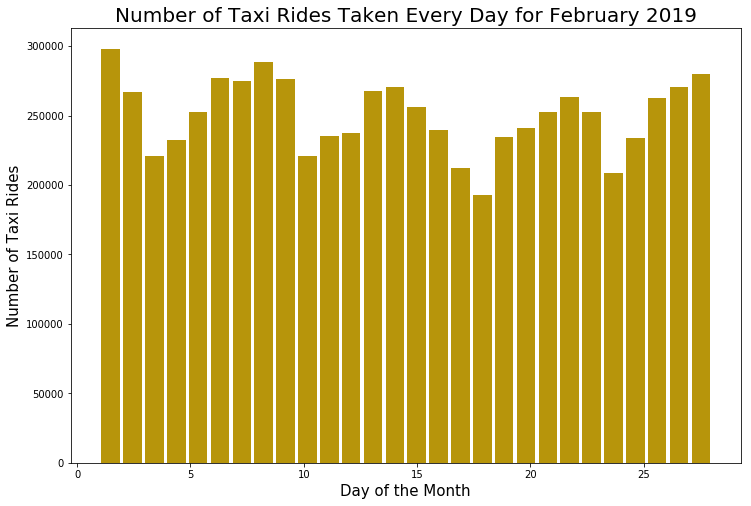

In [15]:
import pylab as pl
#So that the plot is displayed every time this notebook is run.
%matplotlib inline

# histogram of day vs count. 28 bars for each day.
myhist = df3.hist(column="day", bins=28, grid=False, figsize=(12,8), color="#B7950B", rwidth=0.85)

pl.title("Number of Taxi Rides Taken Every Day for February 2019", fontsize=20)
pl.ylabel("Number of Taxi Rides", fontsize=15)
pl.xlabel("Day of the Month", fontsize=15)

Here are several box plots to test the theory if the day of the week plays a role in the price of a taxi ride. The seven box plots show the prices of taxi rides for each day of the week.  However, there are extreme outliers that must be removed in order to evaluate the distribution of these box plots.



Text(0, 0.5, 'Price')

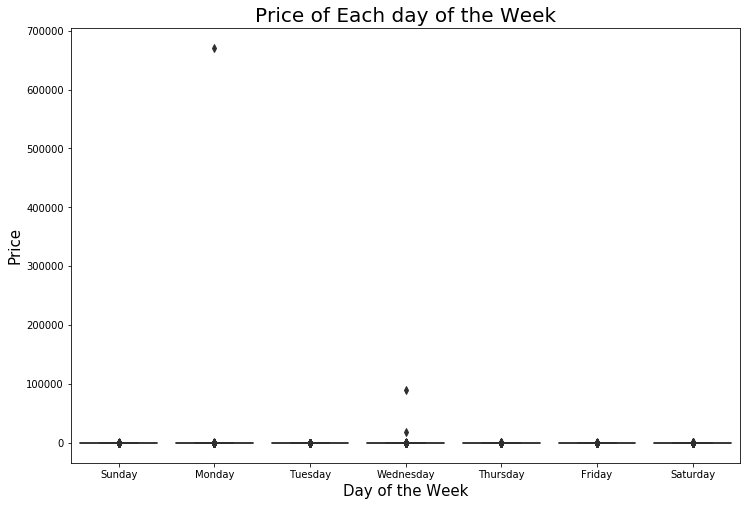

In [16]:
import seaborn as sns
pl.figure(figsize=(12, 8))
# x is the day of the week, y is the fare amount, order is organized by the order of the days of the week.
bplot = sns.boxplot(x = 'day_of_week', y = 'fare_amount', data = df3, order=["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"], 
            palette="colorblind")


bplot.axes.set_title("Price of Each day of the Week",
                    fontsize=20)
 
bplot.set_xlabel("Day of the Week", 
                fontsize=15)
 
bplot.set_ylabel("Price",
                fontsize=15)


Before we begin cleaning, we set a new dataset named df4 which represents to uncleaned version of df3.  This new data set will be used later in future cleaning.

In [17]:
df4 = df3

## **Data Cleaning** ##

Before visualizing this data again, we must clean it.  Therefore, we must subset the data to remove extreme outliers.  Also, these extreme outliers could affect our data when we perform machine learning, so it is okay to remove these.  Additionally, some of the prices are negative or zero values. We will also take the negative or zero values out of the dataset because we do not understand how prices could be negative.

In [18]:
df3 = df3[(df3['fare_amount'] < 600) & (df3['fare_amount'] > 0)]

To see that this filtering worked, we present the new minimum value for the price.

In [19]:
df3['fare_amount'].min()

0.01

Here is the the new maximum value.

In [20]:
df3['fare_amount'].max()

563.0

We explore the relationship between the day of the week and the price of a taxi ride through box plot visualization.  The seven box plots below show the prices of taxi rides for each day of the week.  As shown in the graph, the box plots all seem to have a similar spread, meaning that the medians of these graphs are generally the same, as well as the first and third quartiles.  Additionally, the maximum and minimum values of these graphs also seem to be about the same.  Although the number of taxi rides per day changes with the day of the week, price does not.  Therefore, the hypothesis that the day of the week plays a role in the price of a taxi ride is incorrect, and day of the week should not be included in the model.  This graph is a zoomed-in version showing the even distribution of the plots.  For more information about how we made the box plots, please visit [this website](http://cmdlinetips.com/2018/03/how-to-make-boxplots-in-python-with-pandas-and-seaborn/).

(-1, 27)

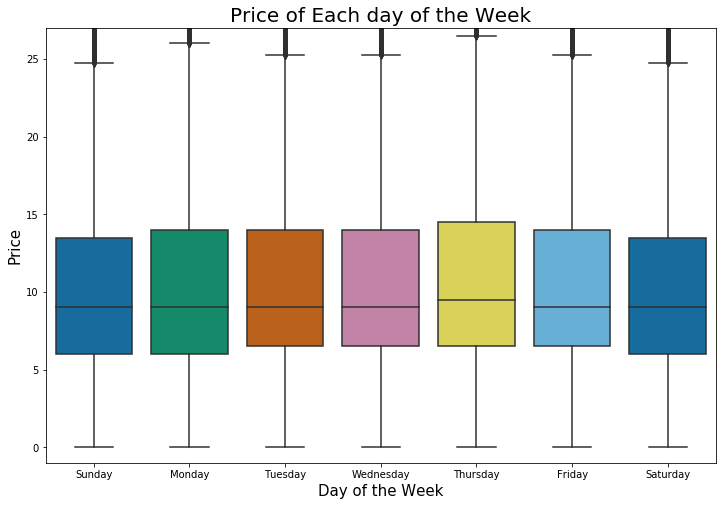

In [21]:
import seaborn as sns
pl.figure(figsize=(12, 8))
bplot = sns.boxplot(x = 'day_of_week', y = 'fare_amount', data = df3, order=["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"], 
            palette="colorblind")


bplot.axes.set_title("Price of Each day of the Week",
                    fontsize=20)
 
bplot.set_xlabel("Day of the Week", 
                fontsize=15)
 
bplot.set_ylabel("Price",
                fontsize=15)
# the zoomed in graph from the most common prices.
pl.ylim(-1,27)


We then import matplotlib to visualize the average temperature for every day in February 2019. Since we are using temperature as one of the factors to model price, this graph simply shows that the average temperature changes as the day of the month changes with no significant pattern.

In this data, temperature is measured in fahrenheit, precipitation is measured in inches, diastance is measured in miles, and wind speed is measured in miles per hour.

Text(0, 0.5, 'Average Temperature')

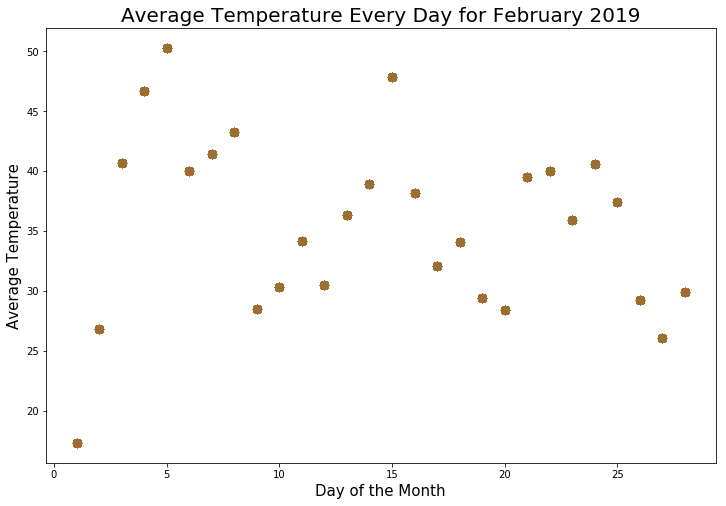

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
plt.scatter(df3.day, df3.avg_temp, s=65, c="#9C6F31")
plt.title("Average Temperature Every Day for February 2019", fontsize=20)
plt.xlabel("Day of the Month", fontsize=15)
plt.ylabel("Average Temperature", fontsize=15)

Using pyplot, we made a scatter plot of distance vs. the price of a taxi ride.  We predict that a higher distance is associated with a higher price for a taxi ride.  As shown in the scatter plot, this prediction is true, as there seems to be a strong, positive, linear relationship between distance and price of a taxi ride.

(0, 150)

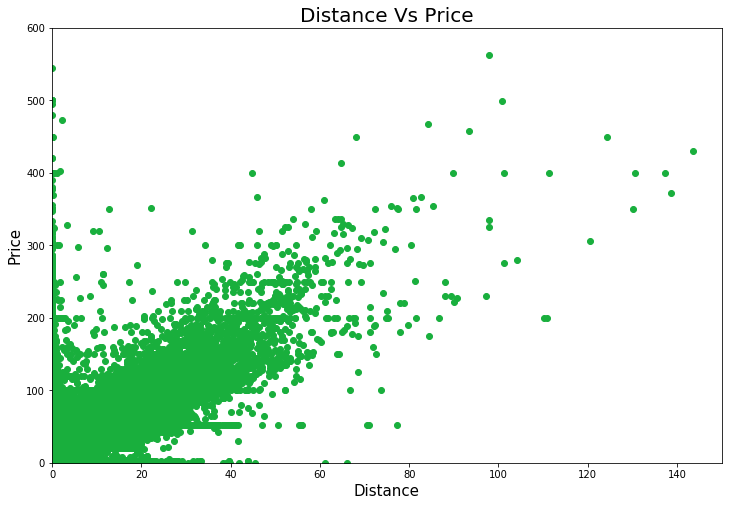

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
plt.scatter(df3.trip_distance, df3.fare_amount, c="#19AF3D")
plt.title("Distance Vs Price", fontsize=20)
plt.xlabel("Distance", fontsize=15)
plt.ylabel("Price", fontsize=15)
plt.ylim(0,600)
plt.xlim(0,150)

## **Data Cleaning II** ##

Looking at the graph above, it appears that there is still a lot of data that does not follow a trend.  For example, there are values with a very low distance with a very high price, and there are values with a high distance with a very low price.  From a logical standpoint, this does not really make sense, as we do not understand how someone travelling 1 mile can pay $500 or someon traveling almost 70 miles doesn't have to pay anython.  Therefore, we must change these extreme outliers.  We do not want these outliers to affect our model later on, so we have selected a new price that seems more logical.  In the first statement, if the distance is less than 10 and the price is greater than 100, we set the price equal to 100. Here, the uncleaned data, df4 is used. 

In [24]:
for i in range(0, df4.trip_distance.size):
  if (df4.trip_distance[i] < 10 and df4.fare_amount[i] > 100):
    df4.fare_amount[i] = 100
    i= i+1


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


For the next statement, if the distance is greater than 40 and the price is less than 110, we set the price equal to 150.

In [25]:
for i in range(0, df4.trip_distance.size):
  if (df4.trip_distance[i] > 40 and df4.fare_amount[i] < 110):
    df4.fare_amount[i] = 150
    i= i+1

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


Now we can subset the data just like from df3 by removing extreme and negative price values.

In [26]:
df4 = df4[(df4['fare_amount'] < 600) & (df4['fare_amount'] > 0)]

To see the difference, let's plot distance vs. price again.  Now the extreme outliers have been changed and we can see the trend more clearly. 

(0, 150)

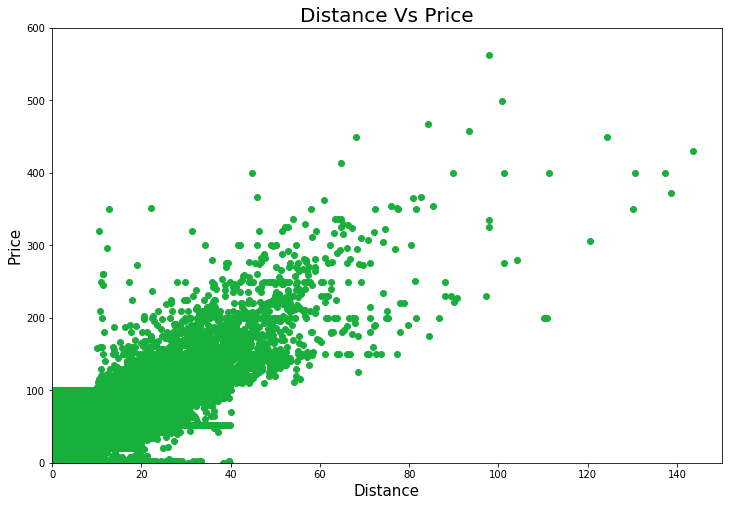

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
plt.scatter(df4.trip_distance, df4.fare_amount, c="#19AF3D")
plt.title("Distance Vs Price", fontsize=20)
plt.xlabel("Distance", fontsize=15)
plt.ylabel("Price", fontsize=15)
plt.ylim(0,600)
plt.xlim(0,150)

We can zoom in the graph even further by looking at distances from 1 to 20 miles and prices from 0 to 100 dollars.  It is ideal to zoom in in this area since this region represents the majority of data points.  Additionally, on the graph, this region just appears to look like a green square.  However, zooming in reveals that the trend is still being followed; as distance increases, price is generally increasing as well.

(0, 20)

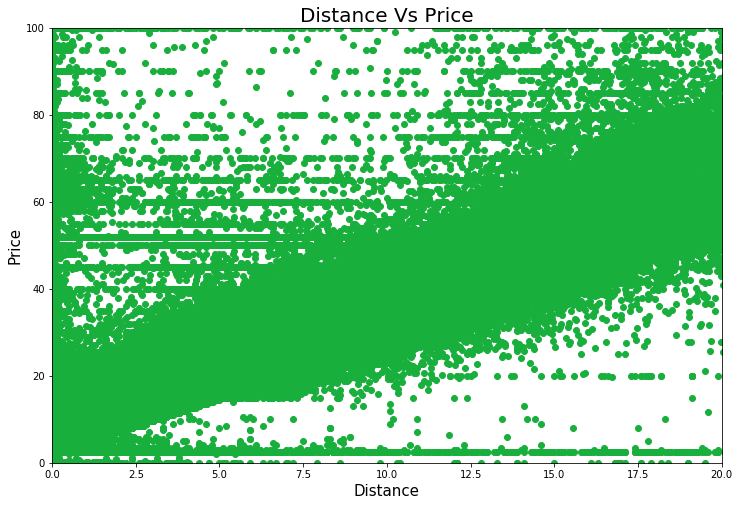

In [28]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
plt.scatter(df4.trip_distance, df4.fare_amount, c="#19AF3D")
plt.title("Distance Vs Price", fontsize=20)
plt.xlabel("Distance", fontsize=15)
plt.ylabel("Price", fontsize=15)
plt.ylim(0,100)
plt.xlim(0,20)

## **Correlations**

Next, we can make a correlation matrix to view relationships of interest between variables.  For more information about the code, please visit [this website](https://stackoverflow.com/questions/45376122/how-to-create-correlation-matrix-only-for-specific-columns-combination-using-py).  Since we are predicting price, let's see some relationships relating to the variable for price, *fare_amount*.  Noticeably, the trip distance and the toll amount have the largest effects, having correlations with fare_amount of 0.91 and 0.56, respectively.

The high correlation with trip distance makes sense in that a longer distance is correlated with a higher price.  This relationship is visualized in the Distance vs Price graph above.

The positive correlation between toll amount and price also makes sense because higher tolls are associated with higher costs.

It is interesting to see that temperature has a very large effect on the congestion surcharge, but very little effect on the price (fare amount).  However, the congestion surcharge actually has a negative correlation with the fare amount.  A congestion surcharge is an extra charge when vehicles pass through a congestion zone, which is south of 96th street in Manhattan.  For more information about this charge, please visit [this website](https://www1.nyc.gov/site/tlc/about/congestion-surcharge.page#:~:targetText=New%20York%20State's%20Congestion%20Surcharge&targetText=The%20congestion%20surcharge%20is%3A,%2DHail%20Liveries%20(Green%20Taxis)).  The negative relationship makes sense since driving in a congested area means that it would take a long time to get from place to place, so the distance would be low.  This is supported by the negative relationship between trip distance and the congestion surcharge.  Additionally, the congestion surcharge has a correlation of about 0.19 with fare amount.  This shows that trips taken south of 96th street, in the most congested area of Manhattan, are associated with a lower fare amount.

Interesetingly, passenger count does not seem to correlate with the price.  Therefore, if all other factors were the same, a taxi ride with one passenger would cost the same as 4 passengers.

Temperature and precipitation seem to have a positive relationship with the fare amount, which goes against our predictions.  However, this relationship actually makes sense.  Let's paint a picture.  People ride in taxis to get from place to place.  People who must travel for long distances will use a taxi regardless of temperature and precipitation because this distance is too far for them to walk.  However, people who travel for short distances can either choose to walk or take a taxi.  On a normal, sunny day, a person in Manhattan traveling about ten blocks will likely choose to walk.  However, on a cold or a rainy day, this person may choose to ride a taxi instead.  Many people will choose to do this on a cold or rainy day.  Because of this, cold and rainy days have more people travelling shorter distances, and thus, the fare amount would decrease.  Therefore, the smaller distances people travel on cold and rainy days means that the fare amount would also be lower.  This is why a higher temperature and precipitation correlates with a higher fare amount.

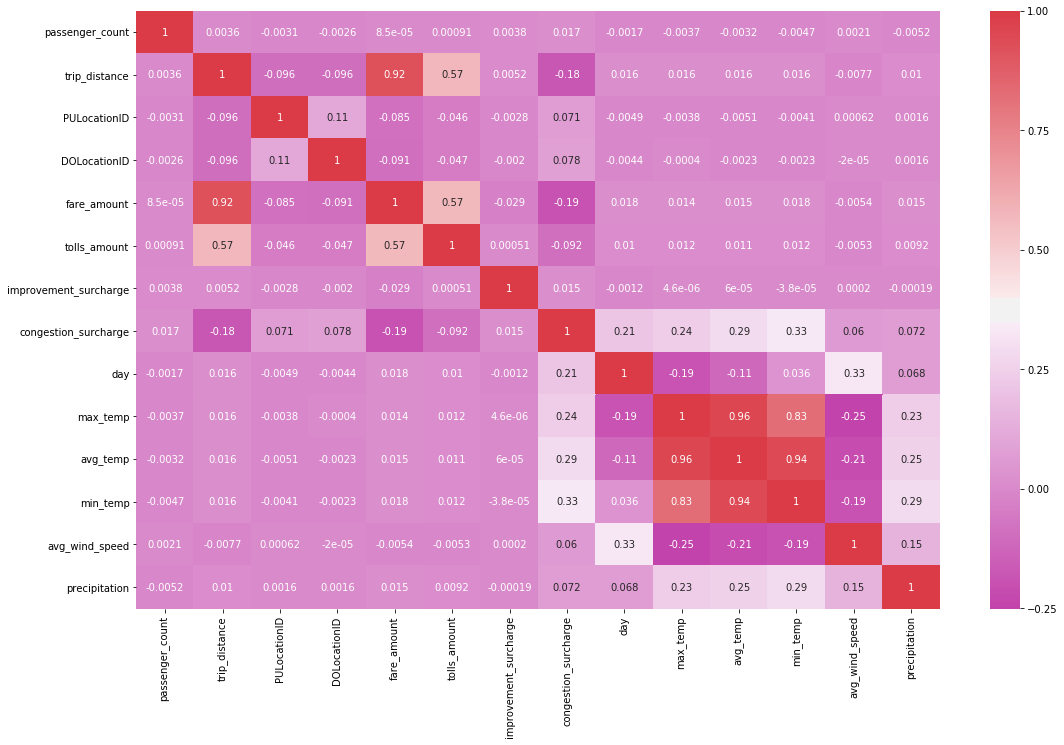

In [29]:
import seaborn as sn

pl.figure(figsize=(18, 11))
corrMatrix = df4.corr()
#Dropping columns we will not use in the model.
heatmapdf = corrMatrix.drop(['VendorID', 'RatecodeID', 'payment_type','extra','mta_tax','tip_amount','total_amount', 'month', 'year','date_y']).drop(['VendorID', 'RatecodeID', 'payment_type','extra','mta_tax','tip_amount','total_amount', 'month', 'year', 'date_y'], axis=1)

sn.heatmap(heatmapdf, annot=True, cmap=sns.diverging_palette(320, 10, as_cmap=True))


We can visualize the previous explanation about how the precipitation and price relationsip in the following box plots.  Although the distribution is roughly the same, there seems to be a slightly larger spread for box plots with a higher amount of precipitation than a lower amount of precipitation.  The first quartile seems to decrease slightly as precipitation increases and the third quartile appears to increase.  Additionally, the maximum values seem to steadily increase as well.  The larger spread for higher amounts of precipitation seem to indicate that people will ride in a cab for a wider range of prices than when precipitation is low. However, this difference is very subtle, as the spread does seem to to increase but not significantly.

(-1, 30)

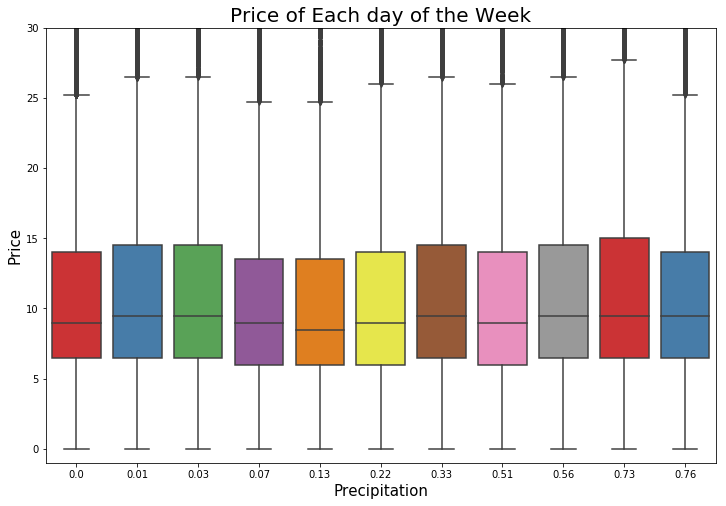

In [30]:
import seaborn as sns
pl.figure(figsize=(12, 8))
bplot = sns.boxplot(x = 'precipitation', y = 'fare_amount', data = df4, 
            palette="Set1")


bplot.axes.set_title("Price of Each day of the Week",
                    fontsize=20)
 
bplot.set_xlabel("Precipitation", 
                fontsize=15)
 
bplot.set_ylabel("Price",
                fontsize=15)

pl.ylim(-1,30)

Next, we can graph the distribution of prices for the four different congestion surcharge prices.  As shown by the negative correlation, price generally decrease as the surcharge increases.  The following boxplots corroborate this claim.  The first plot with 0 surcharge has a very wide spread, possibbly because there are a variety of distances that people can travel when they are not in a congested area.  It would also be easier for people to travel long distances when they are in a less congested area than Manhattan, which is why the maximum value for this boxplot is very high.  

A congestion surcharge implies that a person has ridden a taxi in Manhattan, a very congested area.  The other three boxplots with a charge have a much more condensed spread and generally lower prices.  This is because distances traveled in a congested area like Manhattan would be much less than travelling on more rural roads.  Therefore, this is what we would expect.

(-1, 55)

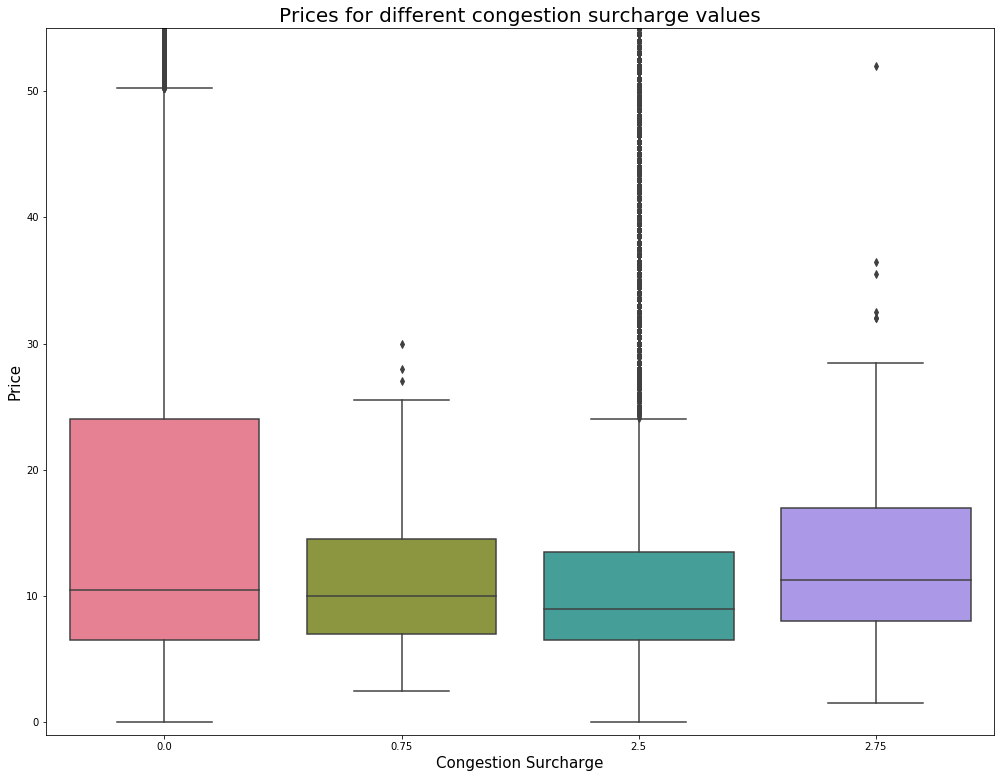

In [31]:
import seaborn as sns
pl.figure(figsize=(17, 13))
bplot = sns.boxplot(x = 'congestion_surcharge', y = 'fare_amount', data = df4, 
            palette="husl")


bplot.axes.set_title("Prices for different congestion surcharge values",
                    fontsize=20)
 
bplot.set_xlabel("Congestion Surcharge", 
                fontsize=15)
 
bplot.set_ylabel("Price",
                fontsize=15)
# the zoomed in graph from the most common prices.
pl.ylim(-1,55)


## **Model Training**

Now we can train a few models to see how accurately we can predict the price of a taxi ride.  Multiple models will be constructed, and we improve the model as we go along.

To try and predict price we used sklearn and statsmodel api to run a multiple linear regression model on the data. We first import all necessary packages. 

In [32]:
from pandas import DataFrame
from sklearn import linear_model
import statsmodels.api as sm

After all the packages are imported, we then specify our independent variables and dependent variable. Y represents the total amount paid for the trip while X represents the distance and average temperature for each day. 

In [33]:
x = df4[['trip_distance', 'avg_temp']]
y = df4[['fare_amount']]

We then split the data into a training set and a test set using train_test_split from sklearn. Here, we use 80% of the data as our training data and 20% of the data as our test data.

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,
                random_state = 0)

Here, we are fitting the multiple linear regression to the training set. 

In [35]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Here we are predicting the test set result. We can see that some of the results are pretty accurate, while others are not.  For example, a predicted price of 23.11 dollars  is pretty close to the actual price of 24.50 dollars, whereas a predicted price of 18.92 dollars is pretty far away from the actual price of 24.50 dollars.  Therefore, this model can be improved.

In [36]:
y_pred = regressor.predict(X_test)
print(y_test)
print(y_pred)

         fare_amount
70322           12.5
46622           24.5
187729          10.5
6727671         12.5
3244247         52.0
4007137          8.0
3439302         30.5
2029562         45.0
5399018          7.5
3312790         22.0
2530496          8.5
4344382         15.0
6508658          6.5
5995700          4.5
2094322         10.5
4692459          9.5
2415892         15.5
1367691          9.0
3999610          8.0
994544           8.5
450563           8.5
3351470          5.0
2684649          3.5
5069982          7.0
6133177         52.0
1359659         10.0
3336955          7.0
283355          17.5
3354481          6.0
1453745         10.0
...              ...
3914091          6.5
1315341          9.0
6429201          8.5
969986          10.0
3071412         27.0
2761033         12.0
4319089          9.5
2429192         10.5
5343633          4.0
4495448         10.0
2391487         13.0
1827614          7.5
2925655          7.0
2528930          8.5
6970321          7.5
2331656      

## **Model Evaluation**

Graphing the predicted values Vs the actual values reveal that a lot of the predicted values are, in fact, close to the actual value, while others are not.  Although the trend is clear, there is still a large spread in the graph.  The model can be improved.

(3.8, 150)

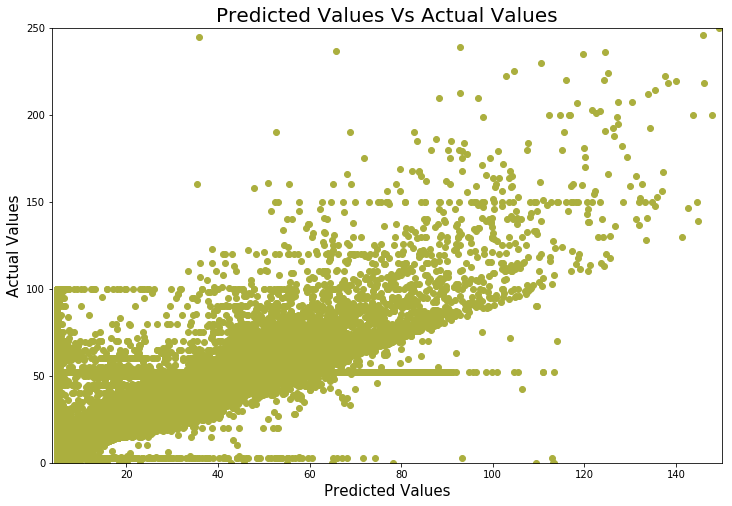

In [37]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
plt.scatter(y_pred, y_test, c="#ABAF3E")
plt.title("Predicted Values Vs Actual Values", fontsize=20)
plt.xlabel("Predicted Values", fontsize=15)
plt.ylabel("Actual Values", fontsize=15)
plt.ylim(0,250)
plt.xlim(3.8,150)

We can now calculate root the mean squared error for this graph.  Code fore this can be found from [this website](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html).  Using the predicted value to estimate the actual values, the code underneath displays that the root mean squared error is about 4.29.

In [38]:
import math
from sklearn.metrics import mean_squared_error
mse1 = mean_squared_error(y_test, y_pred)
math.sqrt(mse1)

4.285652495456871

## **Feature Engineering** ##

Our model can be improved to provide more accurate predictions.  To improve, we will now use a more sophisticated model.  Additionally, many more variables besides trip distance and average temperature will be added.  Additionally, we can combine some of these variables in a formula to enhance predictions as well.  My multiplying some of these factors by a constant in the formula, we can enhance their importance.  Average temperature, wind speed, and precipitation can be combined in a formula.  For example, low temperature and high precipitation can be considered a "bad day," while high temperature and low precipitation could be considered a "good day."  Combining these variables will allow us to determine how the price of a taxi is affected by all of these factors at once. 

In [39]:
df4['combo'] = (2*(df4.avg_temp + df4.min_temp + df4.max_temp))  + (15*df4.precipitation)

Seeing the matrix again reveals that the correlation between the new variable "combo" and the fare amount is, in fact, larger than precipitation and average temperature alone.  So now, we will use the variable "combo" in the model instead of just the average temperature.

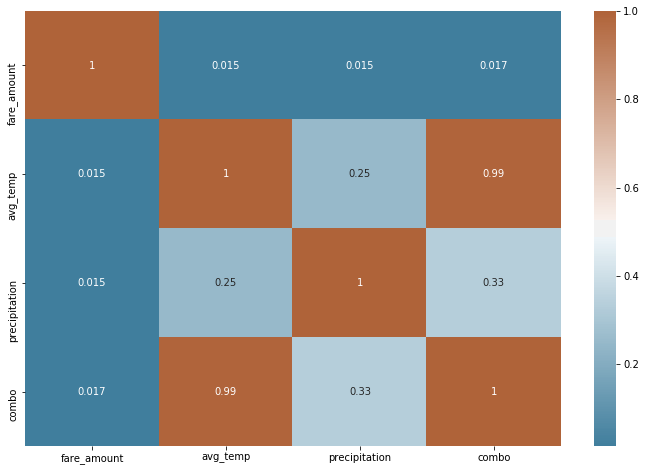

In [40]:
import seaborn as sn

pl.figure(figsize=(12, 8))
corrMatrix = df4.corr()
heatmapdf = corrMatrix.drop(['trip_distance','PULocationID','DOLocationID','tolls_amount','improvement_surcharge','congestion_surcharge','day','max_temp','min_temp','avg_wind_speed','VendorID', 'RatecodeID', 'payment_type','extra','mta_tax','tip_amount','total_amount', 'month', 'year','date_y','passenger_count']).drop(['trip_distance','PULocationID','DOLocationID','tolls_amount','improvement_surcharge','congestion_surcharge','day','max_temp','min_temp','avg_wind_speed','passenger_count','VendorID', 'RatecodeID', 'payment_type','extra','mta_tax','tip_amount','total_amount', 'month', 'year', 'date_y'], axis=1)

sn.heatmap(heatmapdf, annot=True, cmap=sns.diverging_palette(231, 30, as_cmap=True))

## **Regression Model** ##

When optimizing the parameters in a model it is important to keep the bias/variance tradeoff in mind. When attempting to shrink the variance of a parameter to mitigate overfitting, the parameter increases in bias and therefore deviates further from the expected value of the parameter. The bias/variance tradeoff impacts this project because the use of any regression analysis method carries implications about the amount of bias (or variance) we are willing to accept in the parameters. If our parameters had high variance and no bias then we would be overfitting our data to the population model. Conversely, if our parameters have high bias and low variance then we would be underfitting.

Before creating a model for machine learning once again, let's take a look at the variables that will be used.  Running a multiple linear regression model reveals many things about these variables.  Firstly, all of the variables are statistically significant, even at the 1% level!  Not surprisingly, distance is the most significant feature, having a t-statistic of almost 5000!  An increase in a taxi ride of 1 mile is associated with about a 2.6 dollar increase in price, all other factors equal.  Additionally, an increase in the toll amount by 1 dollar is associated with a price increase of amost 0.40 dollars.  Finally with an R^2 value of 0.854, we conclude that 85.4% of the variation in the fare amount is explained by the features in this regression.

In [41]:
# For the regression, set the independent variable and the dependent variable.
x_variable = df4[['passenger_count', 'trip_distance', 
         'tolls_amount', 'combo',
         'improvement_surcharge', 'congestion_surcharge', 
         'avg_wind_speed']]
y_variable = df4[['fare_amount']]

x_variable = sm.add_constant(x_variable)

# Performance of the regression
model_df4 = sm.OLS(y_variable, x_variable).fit()
predictions = model_df4.predict(x_variable) 
print_model = model_df4.summary()
print(print_model)

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return getattr(obj, method)(*args, **kwds)


                            OLS Regression Results                            
Dep. Variable:            fare_amount   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                 5.872e+06
Date:                Tue, 10 Dec 2019   Prob (F-statistic):               0.00
Time:                        03:49:44   Log-Likelihood:            -2.0121e+07
No. Observations:             7006930   AIC:                         4.024e+07
Df Residuals:                 7006922   BIC:                         4.024e+07
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    34.10

## **Model Training II**

Multiple Linear Regression


To optimize the model, we chose to run the full model (with important features) and then implement Backward elimination to select the most statistically significant variables to for the label, price.  We decided to use linear regression because our analysis in data visualization revealed linear relationships.  Additionally, the regression output revealed that the features are all statistically significant.  Thus, now we want to see how well our model can predit the fare value using a multiple linear regression. 

In [42]:
# Running linear regression on full model 
x = df4[['passenger_count', 'trip_distance', 
         'tolls_amount', 'combo',
         'improvement_surcharge', 'congestion_surcharge', 
         'avg_wind_speed']]
y = df4[['fare_amount']]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,
                random_state = 0)
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
print(y_test)
print(y_pred)

         fare_amount
70322           12.5
46622           24.5
187729          10.5
6727671         12.5
3244247         52.0
4007137          8.0
3439302         30.5
2029562         45.0
5399018          7.5
3312790         22.0
2530496          8.5
4344382         15.0
6508658          6.5
5995700          4.5
2094322         10.5
4692459          9.5
2415892         15.5
1367691          9.0
3999610          8.0
994544           8.5
450563           8.5
3351470          5.0
2684649          3.5
5069982          7.0
6133177         52.0
1359659         10.0
3336955          7.0
283355          17.5
3354481          6.0
1453745         10.0
...              ...
3914091          6.5
1315341          9.0
6429201          8.5
969986          10.0
3071412         27.0
2761033         12.0
4319089          9.5
2429192         10.5
5343633          4.0
4495448         10.0
2391487         13.0
1827614          7.5
2925655          7.0
2528930          8.5
6970321          7.5
2331656      

## **Model Evaluation II**

Graphing the predicted values vs the actual values reveal that the predicted values more closely resemble the actual values than the previous graph.  

(3.8, 150)

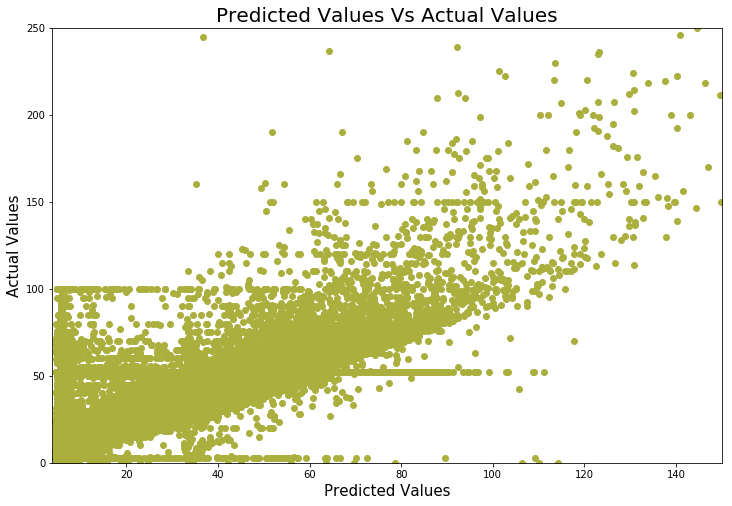

In [43]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
plt.scatter(y_pred, y_test, c="#ABAF3E")
plt.title("Predicted Values Vs Actual Values", fontsize=20)
plt.xlabel("Predicted Values", fontsize=15)
plt.ylabel("Actual Values", fontsize=15)
plt.ylim(0,250)
plt.xlim(3.8,150)

Here we calculate the new root mean squared error and we get a value of about 4.22, slightly less than from the first model.  Our model seems to have improved, since the error has slightly decreased!

In [44]:
from sklearn.metrics import mean_squared_error
mse2 = mean_squared_error(y_test, y_pred)
math.sqrt(mse2)

4.224545764396923

## **Model Training III**

Now we can run a more complex model using Sagemaker.  This is a linear learner model using gradient descent.  Information about this code can be found at [this website]('https://github.com/awslabs/amazon-sagemaker-examples/blob/master/introduction_to_applying_machine_learning/fair_linear_learner/fair_linear_learner.ipynb).  First, import necessary packages.  We are using an absolute loss model in this regression because the absolute loss calculates based on the medians rather than the means.  There are many outliers in this data, meaning that using the median is going to be more accurate.

In [45]:
import boto3
import os
import io
import sagemaker
import sagemaker.amazon.common as smac
import sklearn.preprocessing as preprocessing
from sagemaker import get_execution_role
from sagemaker.predictor import csv_serializer, json_deserializer

Then set data locations.

In [46]:
# Set data locations
bucket = 'smworkshop-zach-karlin'                        # replace this with your own bucket
prefix = 'sagemaker/linear-loss-SGD'   
s3_train_key = '{}/train/recordio-pb-data'.format(prefix)
s3_train_path = os.path.join('s3://', bucket, s3_train_key)
local_raw_data = 'creditcard.csv'
role = get_execution_role()

Confirm access to the S3 bucket.

In [47]:
# Confirm access to s3 bucket
for obj in boto3.resource('s3').Bucket(bucket).objects.all():
    print(obj.key)

sagemaker/linear-loss-SGD/class_weights/output/linear-learner-2019-11-14-18-25-38-397/output/model.tar.gz
sagemaker/linear-loss-SGD/defaults/output/linear-learner-2019-11-14-18-08-06-903/output/model.tar.gz
sagemaker/linear-loss-SGD/output/linear-learner-2019-12-09-21-32-09-881/output/model.tar.gz
sagemaker/linear-loss-SGD/output/linear-learner-2019-12-10-02-48-48-468/output/model.tar.gz
sagemaker/linear-loss-SGD/train/recordio-pb-data
sagemaker/videogames_xgboost/train/train.libsvm
sagemaker/videogames_xgboost/validation/validation.libsvm
sagemaker/videogames_xgboost/videogames-xgboost-2019-11-13-20-35-08/output/model.tar.gz


Because we have categorical features, we must encode them as numbers.

In [48]:
# Encode the categorical features as numbers
def number_encode_features(df):
    result = df.copy()
    encoders = {}
    for column in result.columns:
        if result.dtypes[column] == np.object:
            encoders[column] = preprocessing.LabelEncoder()
            #  print('Column:', column, result[column])
            result[column] = encoders[column].fit_transform(result[column].fillna('None'))
    return result, encoders

The data set is so large that we create a sample of 10% of the data to be analyzed.

In [49]:
dfs = df4.sample(frac=0.1)

To show that this worked, the length of the new data set is, indeed, 10% of the original length.

In [50]:
len(dfs)

700693

Apply the function which does conversion to numeric for categorical variables.

In [51]:
import numpy as np
output = number_encode_features(dfs)

Now we have the new dataset as numerical values.

In [52]:
df_to_numeric=output[0]

Training artifacts uploaded to the S3 bucket.

In [53]:
output_location = 's3://{}/{}/output'.format(bucket, prefix)
print('training artifacts will be uploaded to: {}'.format(output_location))

training artifacts will be uploaded to: s3://smworkshop-zach-karlin/sagemaker/linear-loss-SGD/output


Because we want the last column to be the label, replicate the fare amount column and create a new column called price. Then delete the old column. Here is what the new dataset looks like.

In [54]:
dfs['price'] = dfs['fare_amount']
dfs.drop(columns =['fare_amount'])

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,day,date_y,max_temp,avg_temp,min_temp,avg_wind_speed,precipitation,day_of_week,combo,price
4732308,2,2019-02-09 20:57:53,2019-02-09 21:15:43,5,2.42,1,N,249,170,1,...,9,9,32,28.5,24,21.8,0.07,Saturday,170.05,13.00
3442901,1,2019-02-24 16:38:16,2019-02-24 16:38:45,1,0.00,1,N,239,239,3,...,24,24,47,40.6,35,13.2,0.51,Sunday,252.85,2.50
5260564,2,2019-02-12 06:45:43,2019-02-12 06:50:43,1,1.05,1,N,90,246,2,...,12,12,36,30.5,26,15.2,0.00,Tuesday,185.00,6.00
6668730,2,2019-02-19 16:50:52,2019-02-19 17:17:16,1,9.10,1,N,138,164,1,...,19,19,36,29.4,24,13.4,0.01,Tuesday,178.95,28.00
3319233,2,2019-02-24 01:22:21,2019-02-24 01:27:44,1,1.22,1,N,162,137,1,...,24,24,47,40.6,35,13.2,0.51,Sunday,252.85,6.00
2883133,1,2019-02-21 10:24:49,2019-02-21 10:28:54,1,0.50,1,N,163,237,1,...,21,21,51,39.5,32,9.1,0.73,Thursday,255.95,4.50
3234716,2,2019-02-11 18:29:20,2019-02-11 18:34:14,1,0.65,1,N,234,170,1,...,11,11,37,34.2,31,7.0,0.00,Monday,204.40,4.50
2810640,1,2019-02-28 23:42:32,2019-02-28 23:49:48,1,1.10,1,N,230,163,1,...,28,28,35,29.9,27,10.2,0.03,Thursday,184.25,6.50
6592575,2,2019-02-19 10:12:29,2019-02-19 10:19:31,1,0.87,1,N,143,163,1,...,19,19,36,29.4,24,13.4,0.01,Tuesday,178.95,6.50
2534147,1,2019-02-08 23:14:44,2019-02-08 23:17:30,3,0.80,1,N,237,236,1,...,8,8,54,43.3,33,11.0,0.33,Friday,265.55,4.50


Now we can begin the train/test split.  Testing data will be 20% of the sample data.

In [55]:
d4m = df_to_numeric.as_matrix()
np.random.seed(300)
np.random.shuffle(d4m)
train_size = int(d4m.shape[0] * 0.8)
train_features  = d4m[:train_size, :-1]
train_labels = d4m[:train_size, -1]
test_features = d4m[train_size:, :-1]
test_labels = d4m[train_size:, -1]

# Convert the processed training data to protobuf and write to S3 for linear learner
vectors = np.array([t.tolist() for t in train_features]).astype('float32')
labels = np.array([t.tolist() for t in train_labels]).astype('float32')
buf = io.BytesIO()
smac.write_numpy_to_dense_tensor(buf, vectors, labels)
buf.seek(0)

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if __name__ == '__main__':


0

Now we specify the location of the training set to the S3 bucket.

In [56]:
key = 'recordio-pb-data'
boto3.resource('s3').Bucket(bucket).Object(os.path.join(prefix, 'train', key)).upload_fileobj(buf)
s3_train_data = 's3://{}/{}/train/{}'.format(bucket, prefix, key)
print('uploaded training data location: {}'.format(s3_train_data))

uploaded training data location: s3://smworkshop-zach-karlin/sagemaker/linear-loss-SGD/train/recordio-pb-data


Now we create the model.  We use the absolute loss function since there are a lot of outliers in the data, and we would rather have analysis related to the medians and not the means because the means could be skewed.

In [57]:
from sagemaker.amazon.amazon_estimator import get_image_uri
import sagemaker

container = get_image_uri(boto3.Session().region_name, 'linear-learner', "latest")

sess = sagemaker.Session()
linear = sagemaker.estimator.Estimator(container,
                                       role, 
                                       train_instance_count=1, 
                                       train_instance_type='ml.c4.xlarge',
                                       output_path=output_location,
                                       sagemaker_session=sess)
linear.set_hyperparameters(feature_dim=30,
                           loss = 'absolute_loss',
                           predictor_type='regressor',
                           mini_batch_size=200)



Now we can train the model.

In [58]:
linear.fit({'train': s3_train_data})

2019-12-10 03:50:47 Starting - Starting the training job...
2019-12-10 03:50:49 Starting - Launching requested ML instances.........
2019-12-10 03:52:22 Starting - Preparing the instances for training......
2019-12-10 03:53:45 Downloading - Downloading input data...
2019-12-10 03:54:19 Training - Training image download completed. Training in progress..Docker entrypoint called with argument(s): train
[12/10/2019 03:54:22 INFO 139740162774848] Reading default configuration from /opt/amazon/lib/python2.7/site-packages/algorithm/resources/default-input.json: {u'loss_insensitivity': u'0.01', u'epochs': u'15', u'feature_dim': u'auto', u'init_bias': u'0.0', u'lr_scheduler_factor': u'auto', u'num_calibration_samples': u'10000000', u'accuracy_top_k': u'3', u'_num_kv_servers': u'auto', u'use_bias': u'true', u'num_point_for_scaler': u'10000', u'_log_level': u'info', u'quantile': u'0.5', u'bias_lr_mult': u'auto', u'lr_scheduler_step': u'auto', u'init_method': u'uniform', u'init_sigma': u'0.01', u

From the training model, we can see that the MSE is about 8.02 X 10^-6 meaning that the RMSE is about 0.003.  This number will of course change as a different sample is trained.  For the RMSE, we were able to obtain other values such as 3.4 and 2.7.  Additionally, the absolute loss is about 0.0003.  With an extremely low absolute loss, this number is amazing, as there is little loss between the actual and predicted values.

## **Model Evaluation III**

No we can make predictions about the model.

In [59]:
from sagemaker.predictor import csv_serializer, json_deserializer
linear_predictor = linear.deploy(initial_instance_count=1,
                                 instance_type='ml.t2.medium')


linear_predictor.content_type = 'text/csv'
linear_predictor.serializer = csv_serializer
linear_predictor.deserializer = json_deserializer

---------------------------------------------------------------------------------------------------------------------------!

Here is what the array looks like for the first entry.  We have a predicted price of about 211 dollars in this set.

In [60]:
linear_predictor.predict(test_features[0])

{'predictions': [{'score': 211.8000946044922}]}

Now let's get some predictions.  Due to the large length of the data, let's predict just 1,000 entries.

In [61]:
predictions = [linear_predictor.predict(test_features[i]) for i in range(1000)]

Now let's clean up the array so we can only see the number inside.

In [62]:
y_hat_list = [predictions[i]['predictions'][0]['score'] for i in range(len(predictions))]

Now we have the predictions.

In [63]:
y_hat = np.array(y_hat_list)

For analysis, let's subtract the predicted values from the actual values.  An ideal result should be close to zero.  Looking at these numbers, I would say that most of these values are pretty close!

In [64]:
np.subtract(y_hat,test_labels[1000])

array([ 3.14000946e+01,  4.60010681e+00,  2.39996735e+01,  7.80018005e+00,
        3.97002045e+01,  5.35998932e+01,  3.85025940e+00, -2.08002533e+01,
        1.77001953e-04,  5.34001862e+01,  3.84995422e+00,  3.96999451e+01,
       -2.08008636e+01,  5.36000458e+01, -1.80055847e+00, -2.08002838e+01,
        3.13997284e+01,  7.07997528e+01,  5.35997101e+01,  1.24199854e+02,
       -1.03500275e+01,  7.55500885e+01,  2.39999023e+01,  6.89998718e+01,
        2.39995514e+01,  1.07399561e+02,  7.79993591e+00, -2.41999420e+01,
       -1.44965210e+00,  5.75996796e+01, -1.03500732e+01,  2.57501923e+01,
        7.55493408e+01, -1.45006409e+00,  1.04999780e+02, -7.78007263e+01,
       -7.78005432e+01,  2.40001465e+01, -7.78005356e+01,  2.44140625e-05,
        2.57501312e+01,  4.80000397e+01,  3.85022888e+00,  1.24199487e+02,
       -2.41999420e+01,  3.14000031e+01, -2.08000244e+01,  3.13994995e+01,
        1.92260742e-04, -1.45067444e+00,  3.13999878e+01,  1.04999048e+02,
       -7.78007339e+01,  

Additionally, let's check the maximum difference between a predicted value and an actual value. For this example, it is 124 dollars, which is pretty large, however due to the extreme number of outliers in this set, I would argure that this is a pretty good difference to be a maximum.

In [65]:
np.max(np.abs(np.subtract(y_hat,test_labels[1000])))

124.200341796875

Finally, we can calculate the RMSE for this model.  With an RMSE of about 0.0004, this model is a significant improvement from the last two.  The error is much lower than before!

In [90]:
from sklearn.metrics import mean_squared_error
mse3 = mean_squared_error(y_hat, test_labels[0:1000])
math.sqrt(mse3)

0.00039673118296997006

## **Goal Evaluation and Predictions**

Clearly, the three models created seem to go from worst to best, as the model was adapted, tuned, and improved.  The first model was only a regression based off of two variables with an RMSE of about 4.29.  The second model was a multiple regression model, with many factors including the feature-engineered column, combo.  This model had an RMSE of about 4.22.  Finally, the linear learner model is the most sophisticated since it uses gradient descent.  This model predicted the price based on all of the columns, as categorical variables have been converted to numeric.  This model is clearly the best, as it had an RMSE of about 0.0004, and an absolute loss of about 0.0003.  The model is performing well, as the maximum difference between the predicted and actual values is only a bit over 200.  Also, many of the values when subtracting the predicted and actual values are very close to zero.

Comparing this model to real-world measures, I believe it performs quite well.  From [this website]('https://www.taxifarefinder.com/'), it is specified that their "taxi fare estimates are known to be the most accurate of any taxi website."  Their algorithm also takes into account other factors other than distance travelled and time spent in a cab.  However, their algorithm does not take into account extreme weather conditions and precipitation.  Therefore, it may seem like our model can perform quite well here since we take both of those factors into account as well as many other factors as well.

According to [this website]('http://cs229.stanford.edu/proj2016/report/AntoniadesFadaviFobaAmonJuniorNewYorkCityCabPricing-report.pdf'), they were able to predict New York taxi rides with an error of about 0.0002.  This is very similar to our final model, as it was able to predict with an RMSE of about 0.0004.
  
  The model that we made is very applicable to real-life scenarios. Predicting the fare of taxi rides can not only be useful to consumers but it could also be useful to the drivers and other competing companies such as Uber/Lyft. For example, taxi-riders can use the model to predict their fare before going into the car. This can be useful for them if they would like to budget their expenses and calculate costs ahead of time. Meanwhile, for drivers it is especially useful as they can calculate their income based on the model. It also helps them in choosing which days to work and which days they can maximize their income. For example, using weather data they can look at the days where the fares would be the highest and decide to work. However, if the fares are not what they expect, then they can take the day off and enjoy their free time. This really enables them to calculate an expected income and be able to meet targets that they want to. 

  Another application that we thought of as a group was competing companies such as Uber or Lyft could use this model to predict the price of taxi fares and use it to their advantage. They can tweak their surge-pricing algorithm to ensure that they are always offering competitive fare prices. 

  Upon asking for feedback from our peers and other students we realized that there were some improvements that could be made to the model. The main way we could improve this model is by adding in more variables that have a relationship with price of taxi fares. For example, we could add a time variable into the model which will fluctuate the expected price of the fare if it were nighttime vs daytime. Additionally, we could investigate adding a month variable into the model to see if the month of the year has a relationship with the taxi fares. Overall, the main way that we can see to improve the model is by fitting in more variables and trying to find concrete relationships. 
